In [ ]:
# !unzip "/work/Labs/lab8/Lab Assignment 8.zip"

In [ ]:
images = {
    'circles': "/work/Labs/lab8/Lab Assignment 8/circles.png",
    'pcb': '/work/Labs/lab8/Lab Assignment 8/pcb.jpg',
    'circles_and_lines': "/work/Labs/lab8/Lab Assignment 8/circles_and_lines.PNG",
    'balloon': '/work/Labs/lab8/Lab Assignment 8/balloon.PNG',
    'dog': '/work/Labs/lab8/Lab Assignment 8/dog.PNG',
    'falcon': '/work/Labs/lab8/Lab Assignment 8/falcon.PNG',
    'girl': '/work/Labs/lab8/Lab Assignment 8/girl.PNG'
}

In [ ]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/work/Labs/lab8/Lab Assignment 8/circles.png")

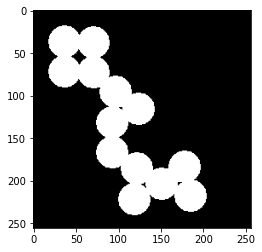

In [ ]:
plt.imshow(img)

In [ ]:
def plt_imshow(image, title=''):
	# convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # plt.figure(figsize = (10,10))
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

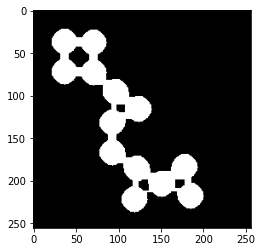

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
morph_img = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel, iterations=1)
plt_imshow(morph_img)

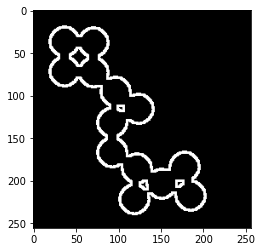

In [ ]:
boundary_img_square = img - morph_img
plt_imshow(boundary_img_square)

### Trying Circle structuring element

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


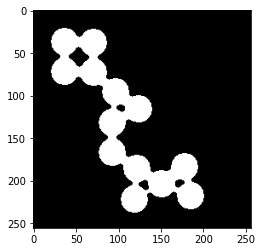

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
print(kernel)
morph_img = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel, iterations=1)
plt_imshow(morph_img)

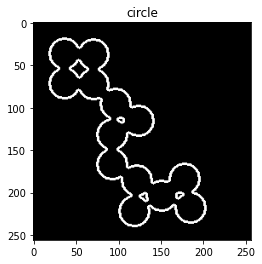

In [ ]:
boundary_img_circle = img-morph_img
plt_imshow(boundary_img_circle, 'circle')

In [ ]:
from skimage.morphology import skeletonize

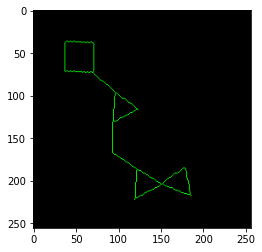

In [ ]:
skeleton = skeletonize(img)
plt_imshow(skeleton)

### Trying to measure number of holes and their diameter

In [ ]:
img = cv2.imread('/work/Labs/lab8/Lab Assignment 8/pcb.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

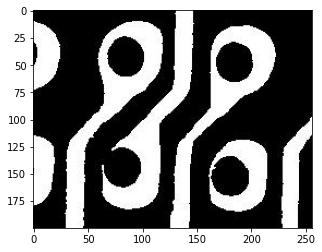

In [ ]:
plt_imshow(img)

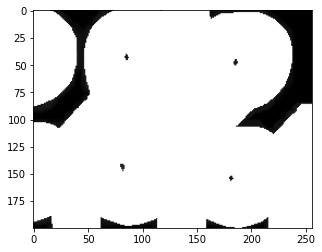

In [ ]:
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))
dilate_img = cv2.morphologyEx(gimg, cv2.MORPH_DILATE, kernel, iterations=3)
plt_imshow(dilate_img)

In [ ]:
detected_circles = cv2.HoughCircles(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 
                   cv2.HOUGH_GRADIENT, 30, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
output = img.copy()

In [ ]:
if detected_circles is not None:
    detected_circles = np.round(detected_circles[0, :]).astype("int")
    for (x, y, r) in detected_circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

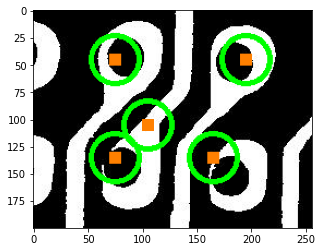

In [ ]:
plt_imshow(output)

## Trying to seperate lines and circles

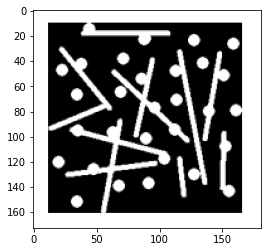

In [ ]:
img = cv2.imread('/work/Labs/lab8/Lab Assignment 8/circles_and_lines.PNG')
plt_imshow(img)

In [ ]:
size = (5, 5)
kernel_rect = cv.getStructuringElement(cv.MORPH_RECT, size)
kernel_cr = cv.getStructuringElement(cv.MORPH_ELLIPSE, size)
open_img = cv.morphologyEx(img, cv.MORPH_OPEN, kernel_cr, iterations=2)
_,thrs = cv.threshold(open_img, 30, 255, cv.THRESH_BINARY)
cir_img = cv.bitwise_and(img, thrs)
lin_img = cv.bitwise_and(img, cv.bitwise_not(cv.erode(cir_img, kernel_cr, iterations=1)))
_,lin_img = cv.threshold(lin_img, 30, 255, cv.THRESH_BINARY)
lin_img = cv.morphologyEx(lin_img, cv.MORPH_OPEN, kernel_cr, iterations=1)

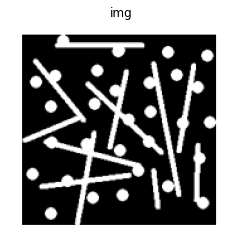

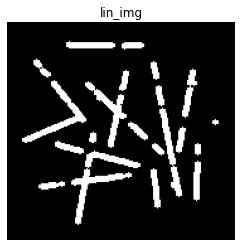

In [ ]:
cv.imwrite("circle.png", cir_img)
cv.imwrite("line.png", lin_img)
dikhao('img', img)
dikhao('lin_img', lin_img)

## Making outline

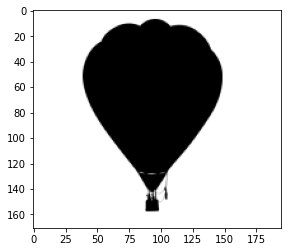

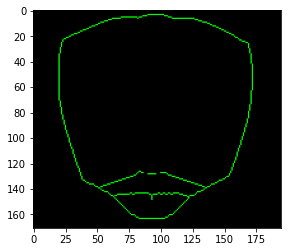

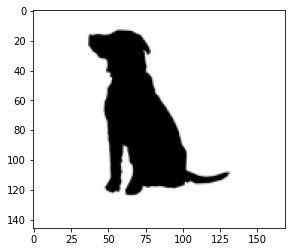

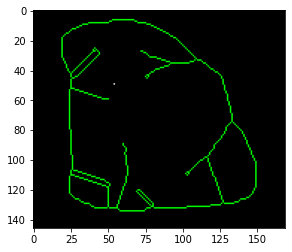

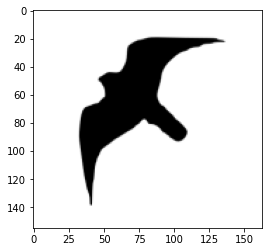

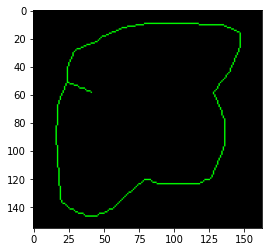

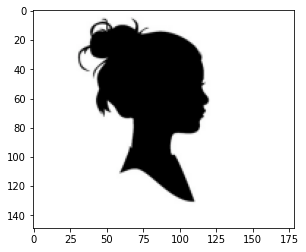

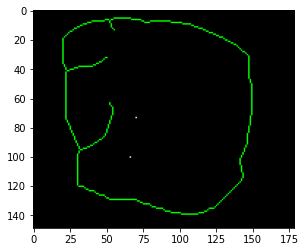

In [ ]:
for name in ['balloon', 'dog', 'falcon', 'girl']:
    img=cv2.imread(images[name])
    skeleton = skeletonize(img)
    plt_imshow(img)
    plt_imshow(skeleton)

## Sharpening the image

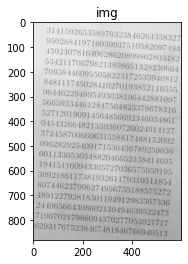

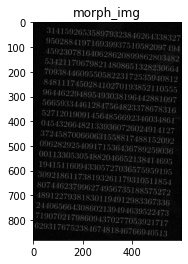

In [ ]:

img = cv2.imread('/work/Labs/lab8/Lab Assignment 8/morf_test.png')
size = (3, 3)
kernel_rect = cv.getStructuringElement(cv.MORPH_RECT, size)
kernel_cr = cv.getStructuringElement(cv.MORPH_ELLIPSE, size)

_, thres = cv.threshold(img, 160, 255, cv.THRESH_BINARY)
morph_img = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel_rect, iterations=3)
close_img = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel_rect, iterations=3)
diff = cv.subtract(close_img, img)
plt_imshow(img, 'img')
plt_imshow(morph_img, 'morph_img')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a021122-34da-482c-a2ea-1b10266af18e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>